In [258]:
import numpy as np, re
from itertools import cycle, combinations, groupby
from collections import defaultdict
from aoclib import list2string
import copy
from matplotlib import pyplot as plt

lines = open('24.txt').read().strip()

In [259]:
#line = 'sesenwnenenewseeswwswswwnenewsewsw'

positions = []
blacks = set()
for line in lines.splitlines():
    pos = [0, 0]
    while line:
        x = re.match(r'([ns]*[ew])', line).group()
        line = line[len(x):]
        if x == 'e':
            pos[1] += 1
        elif x == 'w':
    	    pos[1] -= 1
        elif x == 'ne':
            pos[1] += 1
            pos[0] -= 1
        elif x == 'sw':
            pos[1] -= 1
            pos[0] += 1
        elif x == 'nw':
            pos[0] -= 1
        elif x == 'se':
            pos[0] += 1   
                
    positions.append(pos)
    if tuple(pos) in blacks:
        blacks.remove(tuple(pos))
    else:
        blacks.add(tuple(pos))
print(len(blacks))

x1 = [x for (y, x) in blacks]
y1 = [y for (y, x) in blacks]

blacks

386


{(-17, 1),
 (-17, 2),
 (-17, 3),
 (-17, 4),
 (-17, 6),
 (-17, 9),
 (-17, 11),
 (-17, 12),
 (-17, 14),
 (-17, 15),
 (-16, 1),
 (-16, 2),
 (-16, 7),
 (-16, 8),
 (-16, 9),
 (-16, 11),
 (-16, 13),
 (-16, 14),
 (-16, 16),
 (-15, -2),
 (-15, -1),
 (-15, 2),
 (-15, 3),
 (-15, 5),
 (-15, 7),
 (-15, 8),
 (-15, 9),
 (-15, 11),
 (-15, 15),
 (-15, 17),
 (-14, -2),
 (-14, 1),
 (-14, 3),
 (-14, 5),
 (-14, 6),
 (-14, 8),
 (-14, 12),
 (-14, 13),
 (-14, 15),
 (-13, -3),
 (-13, 0),
 (-13, 4),
 (-13, 5),
 (-13, 9),
 (-13, 10),
 (-13, 13),
 (-13, 15),
 (-13, 16),
 (-12, -5),
 (-12, -1),
 (-12, 2),
 (-12, 5),
 (-12, 7),
 (-12, 8),
 (-12, 9),
 (-12, 11),
 (-12, 16),
 (-12, 17),
 (-11, -6),
 (-11, -4),
 (-11, -2),
 (-11, 0),
 (-11, 8),
 (-11, 10),
 (-11, 12),
 (-11, 13),
 (-11, 15),
 (-11, 17),
 (-10, -3),
 (-10, -2),
 (-10, -1),
 (-10, 3),
 (-10, 4),
 (-10, 5),
 (-10, 9),
 (-10, 10),
 (-10, 11),
 (-10, 17),
 (-9, -8),
 (-9, -7),
 (-9, -1),
 (-9, 1),
 (-9, 2),
 (-9, 3),
 (-9, 5),
 (-9, 7),
 (-9, 16),
 (-9, 1

4214


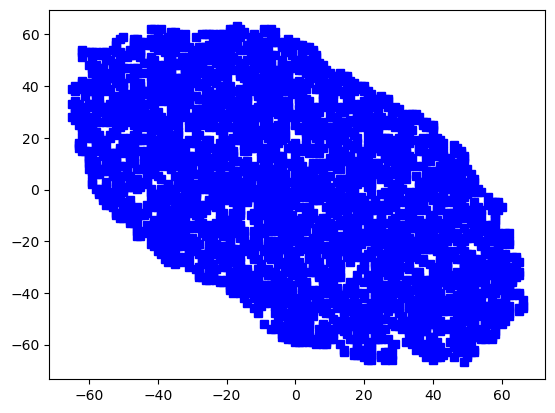

In [260]:
blacks_ = copy.deepcopy(blacks)

neighbors = ((1, 0), (-1, 0), (-1/2, -1/2), (1/2, -1/2), (-1/2, 1/2), (1/2, 1/2))
neighbors = ((0, 1), (0, -1), (-1, 1), (1, -1), (1, 0), (-1, 0))

for i in range(100):
    new_blacks = set()
    for b in blacks_:
        num_neighbors = 0
        for n in neighbors:
            x = b[0] + n[0]
            y = b[1] + n[1]

            num_neighbors_n = [(b[0] + n[0] + nn[0], b[1] + n[1] + nn[1]) in blacks_ for nn in neighbors].count(True)
            
            if (x, y) in blacks_ and num_neighbors_n in [1, 2]:
                new_blacks.add((x, y))
            if (x, y) not in blacks_ and num_neighbors_n  == 2:
                new_blacks.add((x, y))
                
            num_neighbors += 1 if (b[0] + n[0], b[1] + n[1]) in blacks_ else 0

        if num_neighbors in [1, 2]:
            new_blacks.add(b)
            
    blacks_ = copy.copy(new_blacks)
    
    x2 = [x for (y, x) in blacks_]
    y2 = [y + 0.1 for (y, x) in blacks_]

print(len(new_blacks))

fig = plt.figure()
plt.plot(x2, y2, 'bs')

In [44]:
(True, False).count(True)

1

12


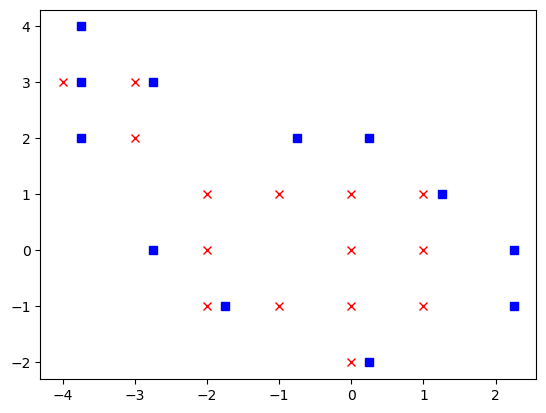

In [242]:
#! /usr/bin/python3

# https://adventofcode.com/2020/day/24

import re
tiles = set()

f = open('24.txt', 'r')
#f = open('sample', 'r')
dir_re = re.compile('(e|se|sw|w|nw|ne)')

while line := f.readline().rstrip():
	dirs = dir_re.split(line)
	x, y = 0, 0
	for d in dirs:
		if d == 'e':
			x += 1
		elif d == 'w':
			x -= 1
		elif d == 'ne':
			x += 1
			y -= 1
		elif d == 'sw':
			x -= 1
			y += 1
		elif d == 'nw':
			y -= 1
		elif d == 'se':
			y += 1
	if (x,y) in tiles:
		tiles.remove((x,y))
	else:
		tiles.add((x,y))

def count(tile):
	total = 0
	if (tile[0] + 1, tile[1]) in tiles:
		total += 1
	if (tile[0] - 1, tile[1]) in tiles:
		total += 1
	if (tile[0] + 1, tile[1] - 1) in tiles:
		total += 1
	if (tile[0] - 1, tile[1] + 1) in tiles:
		total += 1
	if (tile[0], tile[1] - 1) in tiles:
		total += 1
	if (tile[0], tile[1] + 1) in tiles:
		total += 1
	return total
		
for i in range(2):
	new_tiles = set()
	for tile in tiles:
		neighbors = count(tile)
		if neighbors == 1 or neighbors == 2:
			new_tiles.add(tile)
		for ntile in [(tile[0] + 1, tile[1]), (tile[0] - 1, tile[1]), (tile[0] + 1, tile[1] - 1), (tile[0] - 1, tile[1] + 1), (tile[0], tile[1] - 1), (tile[0], tile[1] + 1)]:
			if ntile not in tiles and count(ntile) == 2:
				new_tiles.add(ntile)
	tiles = new_tiles
	if i == 0:
		plt.plot([y for y, x in tiles], [x for y, x in tiles], 'rx')

print(len(tiles))

plt.plot([y+0.25 for y, x in tiles], [x for y, x in tiles], 'bs')